In [14]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

In [12]:
#just to test SVM until user-data is ready
from sklearn import datasets
irisData = datasets.load_iris()
#DataFrame because that's most likely what we'll be using for EEG
irisData = pd.DataFrame(data= np.c_[irisData['data'], irisData['target']], columns= irisData['feature_names'] + ['target'])
irisData.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


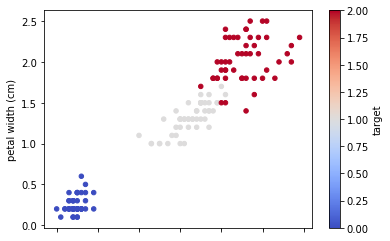

In [21]:
x = "petal length (cm)"
y = "petal width (cm)"
c = "target"
irisData.plot.scatter(x=x,y=y, c=c, cmap=plt.cm.coolwarm)

In [36]:
inputs = irisData[[x,y]].values
label = np.where(irisData[c]==0, 0, 1)
model = svm.SVC(kernel='linear')
model.fit(inputs, label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [71]:
#Visualization
#Alice Zhao - https://github.com/adashofdata/muffin-cupcake/blob/master/muffin_vs_cupcake_demo.ipynb
#If we want to use an RBF kernel (which I'm assuming we do) this code won't work, will update soon

# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(1,3)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

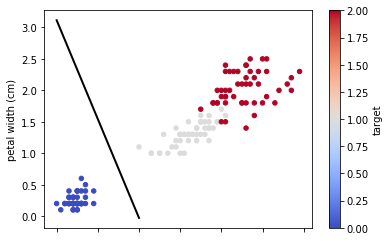

In [72]:
irisData.plot.scatter(x=x,y=y, c=c, cmap=plt.cm.coolwarm)
plt.plot(xx, yy, linewidth=2, color='black')

In [86]:
def classify(x, y):
    if(model.predict([[x, y]]))==0:
        return True
    else:
        return False

In [87]:
print(classify(1,2))

True


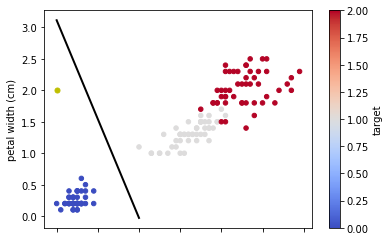

In [88]:
irisData.plot.scatter(x=x,y=y, c=c, cmap=plt.cm.coolwarm)
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(1, 2, 'yo', markersize='5');